In [3]:
import pandas as pd
import numpy as np
import io
import dvc.api
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

import warnings; warnings.simplefilter('ignore')

In [4]:
# cat ../scripts/data_cleaner.py

In [5]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [6]:
df_train = pd.read_csv('../data/df_train.csv')
df_test = pd.read_csv('../data/df_test.csv')

In [7]:
from data_cleaner import Clean_df

In [8]:
train = Clean_df(df_train)
test = Clean_df(df_test)

In [9]:
train.data_pipeline();
test.data_pipeline();

In [10]:
# train.df.to_csv('../data/df_train_prep.csv')
# test.df.to_csv('../data/df_test_prep.csv')

In [8]:
train.df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Quarter,Week,Day,WeekOfYear,DayOfYear,IsWeekDay,CompetitionOpenMonthDuration,PromoOpenMonthDuration,Season,Month_Status
942149,760,6,2013-03-09,8440,1243,1,0,0,0,a,...,1,10,9,10,68,0,26.0,24158.50,Spring,Beginning
184427,453,1,2015-02-16,7930,800,1,1,0,0,a,...,1,8,16,8,47,1,1381.0,24182.00,Winter,Mid
519858,1054,7,2014-03-23,0,0,0,0,0,0,a,...,1,12,23,12,82,0,1370.0,3.75,Spring,End
210936,202,5,2015-01-23,5808,502,1,0,0,0,d,...,1,4,23,4,23,1,56.0,24181.00,Winter,End
478625,1076,2,2014-04-29,3477,550,1,1,0,0,a,...,2,18,29,18,119,1,1371.0,16.25,Spring,End


Text(0.5, 1.0, 'Aggregated Sales per month')

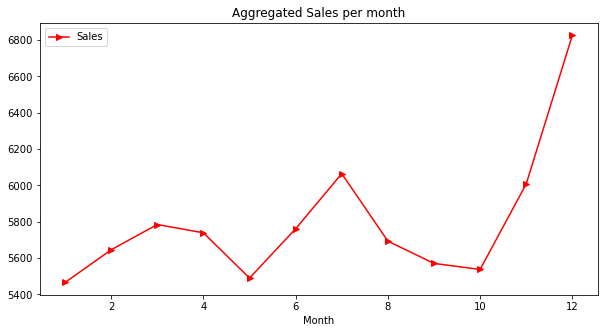

In [28]:
axis = train.df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = '>', color = 'r')
axis.set_title('Aggregated Sales per month')

Text(0.5, 1.0, 'Aggregated Customer count per month')

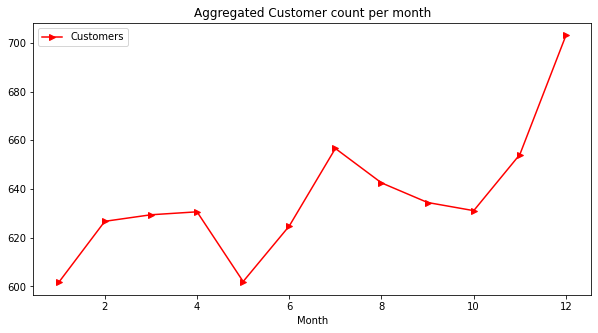

In [27]:
axis = train.df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '>', color = 'r')
axis.set_title('Aggregated Customer count per month')

Text(0.5, 1.0, 'Aggregated Sales After Holiday')

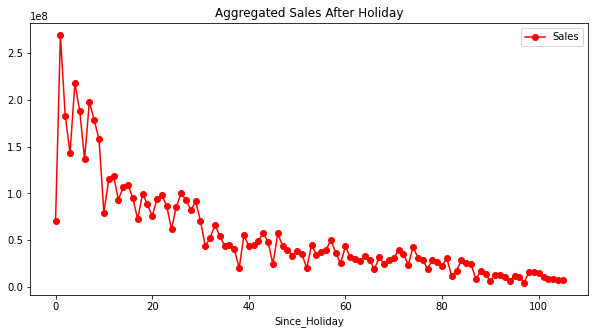

In [21]:
axis = train.df.groupby('Since_Holiday')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Aggregated Sales After Holiday')

Text(0.5, 1.0, 'Aggregated Sales Since Holiday')

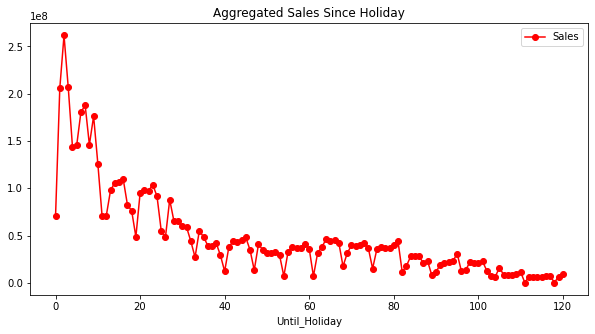

In [22]:
axis = train.df.groupby('Until_Holiday')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Aggregated Sales Since Holiday')

Text(0.5, 1.0, 'Aggregated Sales per Day')

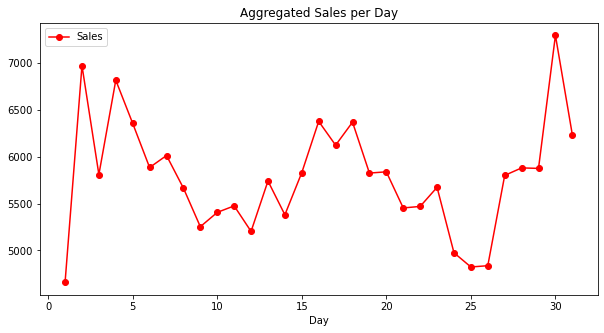

In [26]:
axis = train.df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Aggregated Sales per Day')

Text(0.5, 1.0, 'Sales on a Weekday basis')

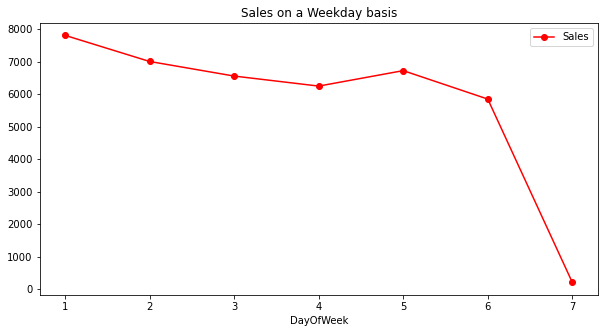

In [31]:
axis = train.df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Sales on a Weekday basis')

Text(0.5, 1.0, 'Sales on a Quarter basis')

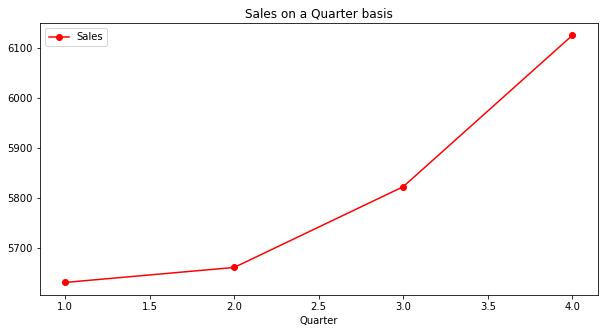

In [32]:
axis = train.df.groupby('Quarter')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Sales on a Quarter Season basis')

In [42]:
train.df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'PromoInterval', 'Until_Holiday',
       'Since_Holiday', 'Year', 'Month', 'Quarter', 'Week', 'Day',
       'WeekOfYear', 'DayOfYear', 'IsWeekDay', 'CompetitionOpenMonthDuration',
       'PromoOpenMonthDuration', 'Season', 'Month_Status'],
      dtype='object')

In [35]:
from plots import Plots as plot

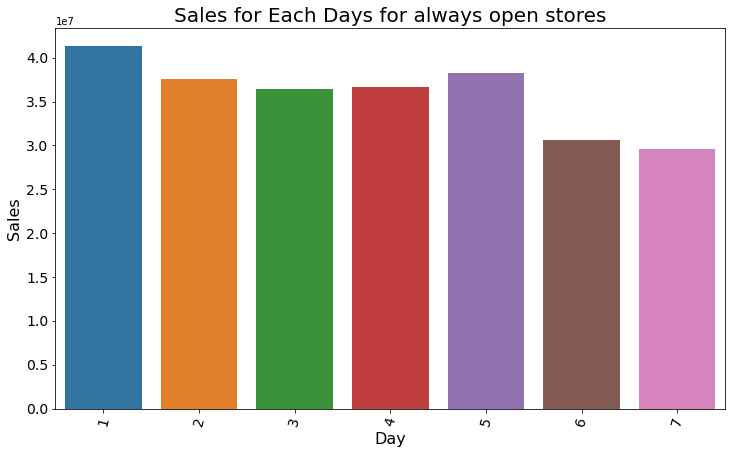

In [39]:
df_open_always = df_train[df_train.DayOfWeek==7]
df_open_always = df_open_always[df_open_always.Open==1]
open_stores = df_open_always.Store.unique()
df_open_stores = df_train.loc[df_train.Store.isin(open_stores)]
data_always = df_open_stores.groupby(['DayOfWeek']).agg({'Sales':'sum','Open':sum}).reset_index()
# The sale in Sunday seems to be the lowest but the variation is worth noticing
plot.plot_bar(data_always,'DayOfWeek','Sales','Sales for Each Days for always open stores', xlabel='Day',ylabel='Sales')

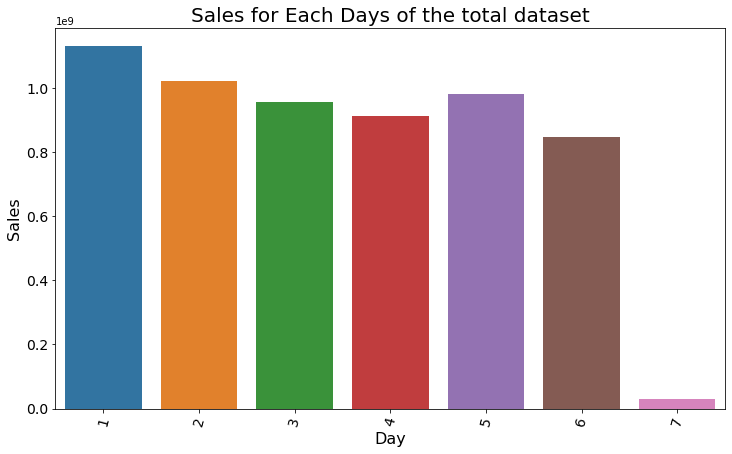

In [41]:
# this graph shows the sale for sunday is low because most stores are closed. but as shown in the above 
# the stores which are open have relatively the same sale as the others, so stores should be open always
data_all = df_train.groupby(['DayOfWeek']).agg({'Sales':'sum','Open':sum}).reset_index()
plot.plot_bar(data_all,'DayOfWeek','Sales','Sales for Each Days of the total dataset', xlabel='Day',ylabel='Sales')

In [9]:
test.df.dtypes

Store                                    int64
DayOfWeek                                int64
Date                            datetime64[ns]
Open                                   float64
Promo                                    int64
StateHoliday                            object
SchoolHoliday                            int64
StoreType                               object
Assortment                              object
CompetitionDistance                    float64
Promo2                                   int64
PromoInterval                           object
Until_Holiday                            int64
Since_Holiday                          float64
Year                                     int64
Month                                    int64
Quarter                                  int64
Week                                     int64
Day                                      int64
WeekOfYear                               int64
DayOfYear                                int64
IsWeekDay    